#### import the libraries

In [6]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#### set random seed for reproducibility

In [7]:
np.random.seed(123)

#### Convert array of values into a data matrix

In [8]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

#### load the dataset

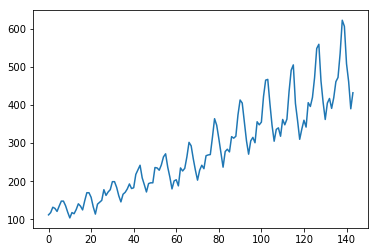

In [10]:
os.chdir("C:/insofe/Office project image/practise")
dataframe = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataframe)
plt.show()
dataset = dataframe.values
dataset = dataset.astype('float32')

#### normalize the dataset

In [11]:

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

#### split into train and test sets

In [15]:

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

#### reshape into X=t and Y=t+1

In [13]:
look_back = 1
trainX, trainY =create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [42]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)
print(testX.shape)
print(trainX)
print(trainY)

(94, 1, 1)
(46, 1, 1)
[[[ 0.01544401]]

 [[ 0.02702703]]

 [[ 0.05405405]]

 [[ 0.04826255]]

 [[ 0.03281853]]

 [[ 0.05984557]]

 [[ 0.08494207]]

 [[ 0.08494207]]

 [[ 0.06177607]]

 [[ 0.02895753]]

 [[ 0.        ]]

 [[ 0.02702703]]

 [[ 0.02123553]]

 [[ 0.04247104]]

 [[ 0.07142857]]

 [[ 0.05984557]]

 [[ 0.04054055]]

 [[ 0.08687258]]

 [[ 0.12741312]]

 [[ 0.12741312]]

 [[ 0.10424709]]

 [[ 0.05598456]]

 [[ 0.01930502]]

 [[ 0.06949806]]

 [[ 0.07915059]]

 [[ 0.08880308]]

 [[ 0.14285713]]

 [[ 0.11389962]]

 [[ 0.13127413]]

 [[ 0.14285713]]

 [[ 0.18339768]]

 [[ 0.18339768]]

 [[ 0.15444016]]

 [[ 0.11196911]]

 [[ 0.08108109]]

 [[ 0.1196911 ]]

 [[ 0.12934363]]

 [[ 0.14671814]]

 [[ 0.17181468]]

 [[ 0.14864865]]

 [[ 0.15250966]]

 [[ 0.22007722]]

 [[ 0.24324325]]

 [[ 0.26640925]]

 [[ 0.2027027 ]]

 [[ 0.16795367]]

 [[ 0.13127413]]

 [[ 0.17374519]]

 [[ 0.17760617]]

 [[ 0.17760617]]

 [[ 0.25482625]]

 [[ 0.25289574]]

 [[ 0.24131274]]

 [[ 0.26833975]]

 [[ 0.

In [18]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
2s - loss: 0.0613
Epoch 2/100
0s - loss: 0.0313
Epoch 3/100
0s - loss: 0.0229
Epoch 4/100
0s - loss: 0.0204
Epoch 5/100
0s - loss: 0.0191
Epoch 6/100
0s - loss: 0.0184
Epoch 7/100
0s - loss: 0.0173
Epoch 8/100
0s - loss: 0.0165
Epoch 9/100
0s - loss: 0.0156
Epoch 10/100
0s - loss: 0.0147
Epoch 11/100
0s - loss: 0.0139
Epoch 12/100
0s - loss: 0.0129
Epoch 13/100
0s - loss: 0.0120
Epoch 14/100
0s - loss: 0.0112
Epoch 15/100
0s - loss: 0.0104
Epoch 16/100
0s - loss: 0.0095
Epoch 17/100
0s - loss: 0.0086
Epoch 18/100
0s - loss: 0.0077
Epoch 19/100
0s - loss: 0.0068
Epoch 20/100
0s - loss: 0.0059
Epoch 21/100
0s - loss: 0.0052
Epoch 22/100
0s - loss: 0.0045
Epoch 23/100
0s - loss: 0.0039
Epoch 24/100
0s - loss: 0.0033
Epoch 25/100
0s - loss: 0.0028
Epoch 26/100
0s - loss: 0.0026
Epoch 27/100
0s - loss: 0.0023
Epoch 28/100
0s - loss: 0.0022
Epoch 29/100
0s - loss: 0.0021
Epoch 30/100
0s - loss: 0.0021
Epoch 31/100
0s - loss: 0.0020
Epoch 32/100
0s - loss: 0.0021
Epoch 33/100
0s -

In [20]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
print(trainPredict)
print(testPredict)

[[ 0.03287165]
 [ 0.04308022]
 [ 0.0671534 ]
 [ 0.06196615]
 [ 0.0482095 ]
 [ 0.07235575]
 [ 0.09506501]
 [ 0.09506501]
 [ 0.07409315]
 [ 0.04478816]
 [ 0.01936766]
 [ 0.04308022]
 [ 0.0379675 ]
 [ 0.05679424]
 [ 0.08280422]
 [ 0.07235575]
 [ 0.05507378]
 [ 0.09682253]
 [ 0.13404906]
 [ 0.13404906]
 [ 0.11270467]
 [ 0.06888586]
 [ 0.03626699]
 [ 0.08105882]
 [ 0.0898013 ]
 [ 0.09858155]
 [ 0.14837554]
 [ 0.12157585]
 [ 0.13762379]
 [ 0.14837554]
 [ 0.18629745]
 [ 0.18629745]
 [ 0.15916659]
 [ 0.11979902]
 [ 0.09155439]
 [ 0.12691405]
 [ 0.13583583]
 [ 0.15196833]
 [ 0.17542055]
 [ 0.15376633]
 [ 0.15736547]
 [ 0.22092161]
 [ 0.24290144]
 [ 0.26494154]
 [ 0.20448956]
 [ 0.17180195]
 [ 0.13762379]
 [ 0.17723122]
 [ 0.18085513]
 [ 0.18085513]
 [ 0.25391534]
 [ 0.25207877]
 [ 0.2410672 ]
 [ 0.26678029]
 [ 0.3054333 ]
 [ 0.32016432]
 [ 0.25575224]
 [ 0.20813662]
 [ 0.15196833]
 [ 0.18992972]
 [ 0.19538406]
 [ 0.16638099]
 [ 0.25207877]
 [ 0.2374    ]
 [ 0.25024253]
 [ 0.3054333 ]
 [ 0.37530

In [21]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [44]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.74 RMSE
Test Score: 48.70 RMSE
517.107097322


In [53]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [56]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

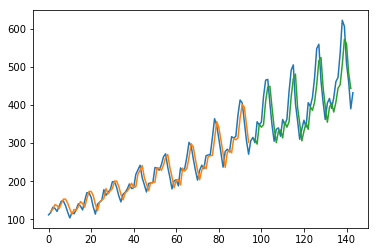

In [31]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()